In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
data=pd.read_csv('Position_Salaries.csv')
data

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

# Spliting into Input and Output

In [58]:
real_x = data.iloc[:,1:2]
real_y = data.iloc[:,2:]

# Linear Regressor

In [59]:
linear_reg=LinearRegression() 

# Traing with Linear-Regression

In [60]:
linear_reg.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Accuracy of the linear Regression Model

In [61]:
linear_reg.score(real_x,real_y)

0.6690412331929895

# Polynomial Regressor

In [62]:
polynomial_reg=PolynomialFeatures(degree=4)


# Fit Tranform of X

In [63]:
real_x_poly=polynomial_reg.fit_transform(real_x)
real_x_poly
#Equation of polynomial
#y=b0+b1x1+b2x1^2...so on 
#agar is equation ko dakha jaye tu b0 by default 1 ha aur second column hamara x1 ha yani input 1 aur isma 10 level isliya 1 to 10 ha aur 3rd x1 ka square ha jasa polynomial ki equation ma hota ha 
#ploynomial ma huma model ko train karna sa phala apna input ko transform karna hoga jasa 2 degree bydefault ha 

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

# Training a model



In [64]:
polynomial_reg.fit(real_x_poly,real_y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

# Linear Regressor for Polynomial

In [65]:
LR2=LinearRegression()
LR2.fit(real_x_poly,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Accuracy of the Polynomial Regression Model

In [66]:
Acc=LR2.score(real_x_poly,real_y)
print("Accuracy of Polynomial Linear REgression Model : " , Acc*100 )

Accuracy of Polynomial Linear REgression Model :  99.73922891706614


# Visualization by graph (Linear Regression)

In [67]:
plt.figure(figsize=(10,6))
plt.title("Salary With Position Level",fontsize=18)
plt.xlabel("Position Level of the Employees",fontsize=15)
plt.ylabel("Salary of the Employees",fontsize=15)
plt.scatter(real_x,real_y)
plt.plot(real_x,linear_reg.predict(real_x))
plt.show()
#yaha hum dakh sakta ha jo linear ,model humna sb sa phla banaya tha us ma kafi error araha q ka data ma ak sa zda level tha 

# Visualization by graph (Polynomial Linear Regression)

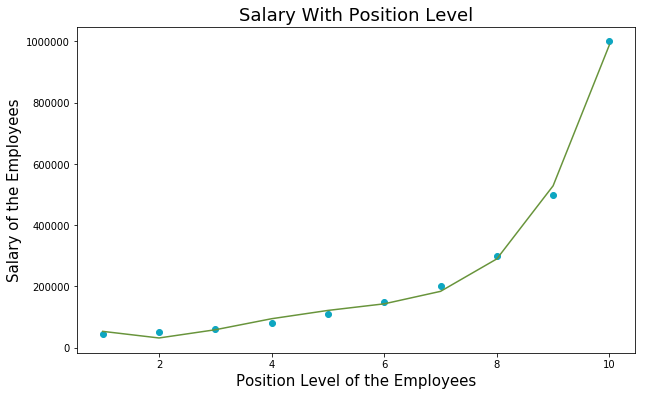

In [68]:

plt.figure(figsize=(10,6))
plt.title("Salary With Position Level",fontsize=18)
plt.xlabel("Position Level of the Employees",fontsize=15)
plt.ylabel("Salary of the Employees",fontsize=15)
plt.scatter(real_x,real_y,color='#0da6c1')
plt.plot(real_x,LR2.predict(polynomial_reg.fit_transform(real_x)),color='#68943b')
plt.show()

# prediction for Linear Regression

In [73]:
linear_reg.predict([[6.5]])

array([[330378.78787879]])

# prediction for polynomial 

In [74]:
LR2.predict(polynomial_reg.fit_transform([[6.5]]))

array([[158862.45265153]])